In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('clean_dataset_part01.csv',sep=";")

In [3]:
df.head()

Unnamed: 0                                              Tweet  Sentimen  \
0           0  emang lemes bgt ya mulut lu, gue yg mau beli-b...      -1.0   
1           1  Cegah mata rantai Covid-19,mari kita dirumah s...       1.0   
2           2  aku mohon yaAllah semoga wabah covid-19 menghi...       1.0   
3           3  Pemprov Papua Naikkan Status Jadi Tanggap Daru...       1.0   
4           4            Covid belum nyampe prigen mbak hmm hoax       0.0   

                                              step01  \
0  emang lemes bgt ya mulut lu gue yg mau beli be...   
1  cegah mata rantai covid number mari kita dirum...   
2  aku mohon yaallah semoga wabah covid number me...   
3  pemprov papua naikkan status jadi tanggap daru...   
4            covid belum nyampe prigen mbak hmm hoax   

                                              tokens  \
0  ['emang', 'lemes', 'bgt', 'ya', 'mulut', 'lu',...   
1  ['cegah', 'mata', 'rantai', 'covid', 'number',...   
2  ['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...   
3  ['pemprov', 'papua', 'naikkan', 'status', 'jad...   
4  ['covid', 'belum', 'nyampe', 'prigen', 'mbak',...   

                                    tokens_perbaikan  \
0  ['memang', 'lemes', 'banget', 'iya', 'mulut', ...   
1  ['cegah', 'mata', 'rantai', 'covid', 'number',...   
2  ['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...   
3  ['pemprov', 'papua', 'naikkan', 'status', 'jad...   
4  ['covid', 'belum', 'nyampe', 'prigen', 'mbak',...   

                                        Stop_removal  \
0  ['lemes', 'banget', 'iya', 'mulut', 'beli', 'b...   
1  ['cegah', 'mata', 'rantai', 'covid', 'number',...   
2  ['mohon', 'yaallah', 'semoga', 'wabah', 'covid...   
3  ['pemprov', 'papua', 'naikkan', 'status', 'tan...   
4  ['covid', 'nyampe', 'prigen', 'mbak', 'aduh', ...   

                                              step02  \
0  lemes banget iya mulut beli beli obat mikirr d...   
1  cegah mata rantai covid number mari dirumah mi...   
2  mohon yaallah semoga wabah covid number menghi...   
3  pemprov papua naikkan status tanggap darurat c...   
4               covid nyampe prigen mbak aduh bohong   

                                       ProcessedText  
0  lemes banget iya mulut beli beli obat mikirr d...  
1  cegah mata rantai covid number mari rumah ming...  
2  mohon yaallah moga wabah covid number hilang r...  
3  pemprov papua naik status tanggap darurat covi...  
4               covid nyampe prigen mbak aduh bohong

In [4]:
df['ProcessedText'].loc[0:5]

0    lemes banget iya mulut beli beli obat mikirr d...
1    cegah mata rantai covid number mari rumah ming...
2    mohon yaallah moga wabah covid number hilang r...
3    pemprov papua naik status tanggap darurat covi...
4                 covid nyampe prigen mbak aduh bohong
5    nyuruh orang pintar togog kerumun orang nulari...
Name: ProcessedText, dtype: object

In [5]:
mask = [isinstance(item, (str, bytes)) for item in df['ProcessedText']]

In [6]:
print(df.loc[mask])

     Unnamed: 0                                              Tweet  Sentimen  \
0             0  emang lemes bgt ya mulut lu, gue yg mau beli-b...      -1.0   
1             1  Cegah mata rantai Covid-19,mari kita dirumah s...       1.0   
2             2  aku mohon yaAllah semoga wabah covid-19 menghi...       1.0   
3             3  Pemprov Papua Naikkan Status Jadi Tanggap Daru...       1.0   
4             4            Covid belum nyampe prigen mbak hmm hoax       0.0   
..          ...                                                ...       ...   
898         900  Seluruh negara di dunia mengalami masa sulit k...       1.0   
899         901  Setelah covid dan skripsi disaster selesai, ma...       1.0   
900         902  Malam ini!! Projek "BENDA BOLEH BINCANG" 9 mal...       0.0   
901         903                Pontang - panting di koyak covid 19      -1.0   
902         904  Masalahnya sekarang isu jangkitan covid. Alaaa...      -1.0   

                                       

In [7]:
import gensim  # Mengimpor pustaka gensim yang digunakan untuk pemrosesan teks
from gensim.utils import simple_preprocess  # Mengimpor fungsi simple_preprocess dari gensim, digunakan untuk memproses teks

# Fungsi sent_to_words akan mengubah kalimat menjadi daftar kata yang sudah diproses
def sent_to_words(sentences):
    for sentence in sentences:  # Untuk setiap kalimat dalam daftar sentences
        # Fungsi simple_preprocess mengubah kalimat menjadi kata-kata kecil tanpa karakter yang tidak diinginkan
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))  
        # 'yield' akan mengembalikan hasil setiap kata yang telah diproses untuk setiap kalimat

In [8]:
word_tokens = df['ProcessedText'].values.tolist()
word_tokens

['lemes banget iya mulut beli beli obat mikirr drmn beli obat kerja devil',
 'cegah mata rantai covid number mari rumah minggu repeated',
 'mohon yaallah moga wabah covid number hilang ramadhan',
 'pemprov papua naik status tanggap darurat covid number allcaps opm allcaps',
 'covid nyampe prigen mbak aduh bohong',
 'nyuruh orang pintar togog kerumun orang nularin covid number lol mikir repeated',
 'pikir2 mnde plk nk setelkn lepas covid',
 'selamat pagi jum at jum at empat pandemi covid number moga kasih sehat moga',
 'hikmah musibah covid number moga jabat perintah sadar depan kaya negara sejahtera rakyat indonesia kaya keluarga penting golong bela penting allcaps wna allcaps jelas2 luka penting rakyat',
 'cegah covid number serta jajar polsek ranji aksi peduli bagi masker gratis guna jalan giat polsek ranji kamis number number febriputraguci',
 'iya allah mohon mu kenan doa doa rana sungguh engkau maha asih maha sayang repeated iya allah lindung sakit jangkit covid number repeated mo

In [11]:
data_tokens = list(sent_to_words(word_tokens))

In [12]:
data_tokens[0:5]

[['lemes',
  'banget',
  'iya',
  'mulut',
  'beli',
  'beli',
  'obat',
  'mikirr',
  'drmn',
  'beli',
  'obat',
  'kerja',
  'devil'],
 ['cegah',
  'mata',
  'rantai',
  'covid',
  'number',
  'mari',
  'rumah',
  'minggu',
  'repeated'],
 ['mohon',
  'yaallah',
  'moga',
  'wabah',
  'covid',
  'number',
  'hilang',
  'ramadhan'],
 ['pemprov',
  'papua',
  'naik',
  'status',
  'tanggap',
  'darurat',
  'covid',
  'number',
  'allcaps',
  'opm',
  'allcaps'],
 ['covid', 'nyampe', 'prigen', 'mbak', 'aduh', 'bohong']]

In [13]:
bigram = gensim.models.Phrases(data_tokens, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_tokens], threshold=100)

In [14]:
# Untuk setiap dokumen di dalam data_tokens (setiap baris dalam data)
for index in range(len(data_tokens)):
  
    # Menambahkan bigram (pasangan kata) yang ditemukan ke dalam data_tokens[index]
    # Jika bigram ditemukan, akan ada tanda '_' pada token
    for token in bigram[data_tokens[index]]:
        if '_' in token:  # Jika token adalah bigram (misalnya "new_york")
            data_tokens[index].append(token)  # Menambahkan bigram ke dokumen

    # Menambahkan trigram (tiga kata) yang ditemukan ke dalam data_tokens[index]
    # Jika trigram ditemukan, akan ada tanda '_' pada token
    for token in trigram[data_tokens[index]]:
        if '_' in token:  # Jika token adalah trigram (misalnya "machine_learning")
            data_tokens[index].append(token)  # Menambahkan trigram ke dokumen

In [15]:
data_tokens[0:3]

[['lemes',
  'banget',
  'iya',
  'mulut',
  'beli',
  'beli',
  'obat',
  'mikirr',
  'drmn',
  'beli',
  'obat',
  'kerja',
  'devil'],
 ['cegah',
  'mata',
  'rantai',
  'covid',
  'number',
  'mari',
  'rumah',
  'minggu',
  'repeated',
  'mata_rantai',
  'mata_rantai',
  'mata_rantai'],
 ['mohon',
  'yaallah',
  'moga',
  'wabah',
  'covid',
  'number',
  'hilang',
  'ramadhan']]

In [16]:
from gensim import corpora, models

# Membuat dictionary dari data_tokens
dictionary = corpora.Dictionary(data_tokens)

# Membuat corpus dari data_tokens
corpus = [dictionary.doc2bow(token) for token in data_tokens]

In [17]:
print(corpus[0:3])

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2)], [(10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(11, 1), (16, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]]


In [18]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from numpy import array

def get_coherence_values(dictionary, corpus, tokens, num_topics):
  model_list = []  # Untuk menyimpan model-model LDA yang dibentuk
  coherence_values = []  # Untuk menyimpan nilai koherensi setiap model LDA
  
  # Loop untuk membuat model LDA dengan berbagai jumlah topik (dari 1 sampai num_topics)
  for i in range(1, num_topics+1):
    # Membuat model LDA dengan jumlah topik i
    model = LdaModel(corpus=corpus, id2word=dictionary, 
                     num_topics=i, iterations=100)
    
    # Menghitung nilai koherensi model LDA menggunakan CoherenceModel
    # Koherensi diukur menggunakan metode 'c_v' yang mengukur sejauh mana kata-kata dalam sebuah topik sering muncul bersama dalam dokumen
    coherence_model = CoherenceModel(model=model, texts=tokens, 
                                     dictionary=dictionary, coherence='c_v')
    
    # Menambahkan model LDA dan nilai koherensinya ke dalam daftar
    model_list.append(model)
    coherence_values.append(coherence_model.get_coherence())
  
  # Mengembalikan daftar model dan nilai koherensi yang dihitung
  return model_list, coherence_values

In [19]:
num_topics = 10
model_list, coherence_values = get_coherence_values(dictionary, corpus, 
                                                    data_tokens, num_topics)

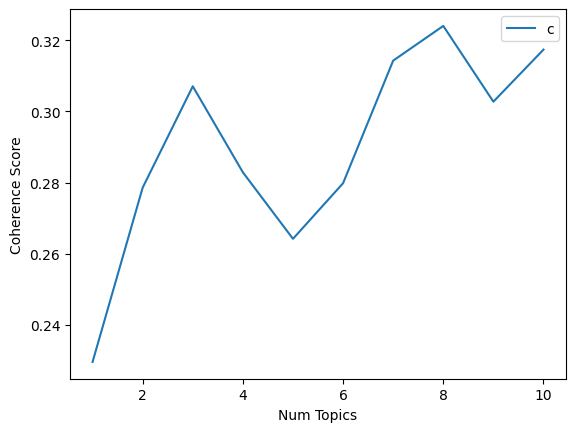

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_topics+1), coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [21]:
plt.savefig('tes-plot.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [22]:
coherence_df = pd.DataFrame(list(zip([i+1 for i in range(num_topics)], coherence_values)), 
                            columns=['num_of_topics', 'coherence_values'])
coherence_df

num_of_topics  coherence_values
0              1          0.229524
1              2          0.278568
2              3          0.307087
3              4          0.282878
4              5          0.264166
5              6          0.279813
6              7          0.314307
7              8          0.324072
8              9          0.302755
9             10          0.317407

In [24]:
coherence_df.to_csv('coherence-value-final.csv', index=False)

In [25]:
# Membangun model LDA (Latent Dirichlet Allocation)
model = LdaModel(corpus=corpus, num_topics=8, id2word=dictionary)

In [26]:
for index, topic in model.print_topics(-1):
  print('Topic {}:\nWord: {}\n'.format(index+1, topic))

Topic 1:
Word: 0.055*"covid" + 0.049*"number" + 0.039*"allcaps" + 0.026*"repeated" + 0.011*"tenaga_medis" + 0.010*"orang" + 0.009*"virus" + 0.006*"kena" + 0.006*"moga" + 0.005*"iya"

Topic 2:
Word: 0.063*"allcaps" + 0.045*"number" + 0.044*"covid" + 0.007*"orang" + 0.006*"sih" + 0.006*"iya" + 0.005*"mandi" + 0.005*"virus" + 0.005*"repeated" + 0.005*"tinggal"

Topic 3:
Word: 0.093*"allcaps" + 0.073*"number" + 0.067*"covid" + 0.013*"repeated" + 0.009*"moga" + 0.008*"virus" + 0.007*"sebar" + 0.006*"orang" + 0.006*"cegah" + 0.005*"indonesia"

Topic 4:
Word: 0.046*"number" + 0.039*"covid" + 0.034*"allcaps" + 0.021*"repeated" + 0.013*"moga" + 0.011*"rumah" + 0.010*"iya" + 0.008*"bantu" + 0.008*"wabah" + 0.008*"perintah"

Topic 5:
Word: 0.048*"covid" + 0.047*"number" + 0.038*"allcaps" + 0.016*"repeated" + 0.008*"orang" + 0.007*"iya" + 0.007*"tangan" + 0.006*"sehat" + 0.006*"pandemi" + 0.006*"jaga"

Topic 6:
Word: 0.068*"allcaps" + 0.061*"number" + 0.048*"covid" + 0.008*"orang" + 0.007*"pandemi

In [27]:
import pathlib
pathlib.Path().resolve()

WindowsPath('C:/Users/annis/Documents/Minggu 13/TopicModelling2')

In [28]:
from gensim.test.utils import datapath

temp_file = datapath("C:/Users/annis/Documents/Minggu 13/TopicModelling2/ldamodel")
model.save(temp_file)

In [29]:
temp_file = datapath("C:/Users/annis/Documents/Minggu 13/TopicModelling2/ldamodel")
mymodel = LdaModel.load(temp_file)
mymodel.show_topics(num_topics=8)

[(0,
  '0.055*"covid" + 0.049*"number" + 0.039*"allcaps" + 0.026*"repeated" + 0.011*"tenaga_medis" + 0.010*"orang" + 0.009*"virus" + 0.006*"kena" + 0.006*"moga" + 0.005*"iya"'),
 (1,
  '0.063*"allcaps" + 0.045*"number" + 0.044*"covid" + 0.007*"orang" + 0.006*"sih" + 0.006*"iya" + 0.005*"mandi" + 0.005*"virus" + 0.005*"repeated" + 0.005*"tinggal"'),
 (2,
  '0.093*"allcaps" + 0.073*"number" + 0.067*"covid" + 0.013*"repeated" + 0.009*"moga" + 0.008*"virus" + 0.007*"sebar" + 0.006*"orang" + 0.006*"cegah" + 0.005*"indonesia"'),
 (3,
  '0.046*"number" + 0.039*"covid" + 0.034*"allcaps" + 0.021*"repeated" + 0.013*"moga" + 0.011*"rumah" + 0.010*"iya" + 0.008*"bantu" + 0.008*"wabah" + 0.008*"perintah"'),
 (4,
  '0.048*"covid" + 0.047*"number" + 0.038*"allcaps" + 0.016*"repeated" + 0.008*"orang" + 0.007*"iya" + 0.007*"tangan" + 0.006*"sehat" + 0.006*"pandemi" + 0.006*"jaga"'),
 (5,
  '0.068*"allcaps" + 0.061*"number" + 0.048*"covid" + 0.008*"orang" + 0.007*"pandemi" + 0.007*"rumah" + 0.006*"iya" 

In [35]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_tokens):
    # Inisialisasi output sebagai DataFrame kosong
    sent_topics_df = pd.DataFrame()

    # Mengambil topik utama untuk setiap dokumen
    for i, row_list in enumerate(ldamodel[corpus]):
        # Jika ldamodel.per_word_topics bernilai True, maka ambil topik untuk setiap kata
        # Jika tidak, ambil topik secara keseluruhan untuk dokumen
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        
        # Urutkan topik berdasarkan kontribusinya (nilai prop_topic) dari yang terbesar
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Ambil topik dominan, persentase kontribusinya, dan kata kunci untuk topik tersebut
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # Jika ini adalah topik dominan (dengan kontribusi terbesar)
                wp = ldamodel.show_topic(topic_num)  # Ambil kata-kata kunci dari topik tersebut
                topic_keywords = ", ".join([word for word, prop in wp])  # Gabungkan kata kunci
                # Tambahkan data topik dominan, persentase kontribusi, dan kata kunci ke DataFrame
                temp_df = pd.DataFrame([[int(topic_num), round(prop_topic, 4), topic_keywords]], columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
                sent_topics_df = pd.concat([sent_topics_df, temp_df], ignore_index=True)  # Gabungkan DataFrame
            else:
                break

    # Beri nama kolom untuk DataFrame
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Tambahkan teks asli (dokumen) ke akhir DataFrame sebagai kolom baru
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    
    # Kembalikan DataFrame yang berisi topik dominan, kontribusi, kata kunci, dan teks asli
    return(sent_topics_df)

In [36]:
# Menggunakan fungsi format_topics_sentences untuk mendapatkan DataFrame yang berisi topik dominan, kontribusi topik, kata kunci, dan teks untuk setiap dokumen
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, 
                                                  corpus=corpus, 
                                                  texts=data_tokens)

# Reset index dari DataFrame untuk memastikan bahwa urutan baris dimulai dari 0 dan tidak ada index yang hilang
df_dominant_topic = df_topic_sents_keywords.reset_index()

# Memberikan nama kolom yang lebih deskriptif agar mudah dimengerti
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 
                             'Topic_Perc_Contrib', 'Keywords', 'Text']

In [37]:
df_dominant_topic[:100:]

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0             0               5              0.9374   
1             1               7              0.9326   
2             2               3              0.9027   
3             3               5              0.9270   
4             4               4              0.8749   
..          ...             ...                 ...   
95           95               6              0.9676   
96           96               5              0.7858   
97           97               4              0.8905   
98           98               5              0.9698   
99           99               5              0.8905   

                                             Keywords  \
0   allcaps, number, covid, orang, pandemi, rumah,...   
1   covid, number, allcaps, mata_rantai, repeated,...   
2   number, covid, allcaps, repeated, moga, rumah,...   
3   allcaps, number, covid, orang, pandemi, rumah,...   
4   covid, number, allcaps, repeated, orang, iya, ...   
..                                                ...   
95  number, covid, allcaps, repeated, makam_jenaza...   
96  allcaps, number, covid, orang, pandemi, rumah,...   
97  covid, number, allcaps, repeated, orang, iya, ...   
98  allcaps, number, covid, orang, pandemi, rumah,...   
99  allcaps, number, covid, orang, pandemi, rumah,...   

                                                 Text  
0   [lemes, banget, iya, mulut, beli, beli, obat, ...  
1   [cegah, mata, rantai, covid, number, mari, rum...  
2   [mohon, yaallah, moga, wabah, covid, number, h...  
3   [pemprov, papua, naik, status, tanggap, darura...  
4         [covid, nyampe, prigen, mbak, aduh, bohong]  
..                                                ...  
95  [am, mrs, lestari, abyasa, balikpapan, terima,...  
96  [tunggu, wabah, allcaps, covid, allcaps, numbe...  
97  [koruptor, jahat, bebas, alas, pandemi, covid,...  
98  [number, angkuh, sombong, serba, bukankh, viru...  
99  [number, nyata, covid, number, klaster, umrah,...  

[100 rows x 5 columns]

In [38]:
# Menyimpan DataFrame df_dominant_topic ke dalam file CSV
df_dominant_topic.to_csv('dominant_topic_resuls.csv', index=False)

In [39]:
dom = pd.read_csv('dominant_topic_resuls.csv')

In [40]:
dom

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0              0               5              0.9374   
1              1               7              0.9326   
2              2               3              0.9027   
3              3               5              0.9270   
4              4               4              0.8749   
..           ...             ...                 ...   
898          898               3              0.9676   
899          899               4              0.9027   
900          900               2              0.9769   
901          901               2              0.8540   
902          902               3              0.9635   

                                              Keywords  \
0    allcaps, number, covid, orang, pandemi, rumah,...   
1    covid, number, allcaps, mata_rantai, repeated,...   
2    number, covid, allcaps, repeated, moga, rumah,...   
3    allcaps, number, covid, orang, pandemi, rumah,...   
4    covid, number, allcaps, repeated, orang, iya, ...   
..                                                 ...   
898  number, covid, allcaps, repeated, moga, rumah,...   
899  covid, number, allcaps, repeated, orang, iya, ...   
900  allcaps, number, covid, repeated, moga, virus,...   
901  allcaps, number, covid, repeated, moga, virus,...   
902  number, covid, allcaps, repeated, moga, rumah,...   

                                                  Text  
0    ['lemes', 'banget', 'iya', 'mulut', 'beli', 'b...  
1    ['cegah', 'mata', 'rantai', 'covid', 'number',...  
2    ['mohon', 'yaallah', 'moga', 'wabah', 'covid',...  
3    ['pemprov', 'papua', 'naik', 'status', 'tangga...  
4    ['covid', 'nyampe', 'prigen', 'mbak', 'aduh', ...  
..                                                 ...  
898  ['negara', 'dunia', 'alami', 'sulit', 'covid',...  
899  ['covid', 'skripsi', 'disaster', 'selesai', 'b...  
900  ['malam', 'repeated', 'proyek', 'allcaps', 'be...  
901  ['pontang', 'panting', 'koyak', 'covid', 'numb...  
902  ['isu', 'jangkit', 'covid', 'ala', 'elongated'...  

[903 rows x 5 columns]